In [134]:
# This notebook plays with the MNIST digits dataset, for which I use the
# parser https://pypi.org/project/python-mnist/
# and the official data source http://www.itl.nist.gov/iaui/vip/cs_links/EMNIST/gzip.zip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from mnist import MNIST
mndata = MNIST('/Users/wltrimbl/git/python-mnist/data')
images, labels = mndata.load_training()
testX, testY = mndata.load_testing()

type(testX), type(testY)

(list, array.array)

In [135]:
# what is array.array?  It doesn't have methods familiar to me.  
# convert everything to numpy.
images = np.array(images)
labels = np.array(labels)
X=images
Y=labels
testX = np.array(testX)
testY= np.array(testY)

In [136]:
digits = labels

In [137]:
digits[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [138]:
digits = np.array(images)

In [139]:
digits.shape

(60000, 784)

In [140]:
p = np.reshape(digits, newshape=( 60000, 28,28))

In [141]:
p.shape

(60000, 28, 28)

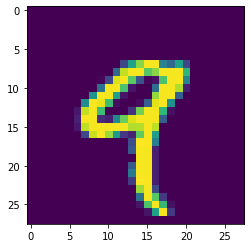

In [142]:
plt.imshow(p[4,::])

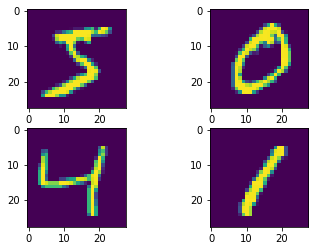

In [143]:
plt.subplot(221)
plt.imshow(p[0,::])
plt.subplot(222)
plt.imshow(p[1,::])
plt.subplot(223)
plt.imshow(p[2,::])
plt.subplot(224)
plt.imshow(p[3,::])
plt.savefig("MNIST.png", dpi=300, bbox_inches="tight")

In [144]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=500)
lr.fit(X, Y)
lr.score(testX, testY)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9219

In [145]:
lr.coef_.shape

(10, 784)

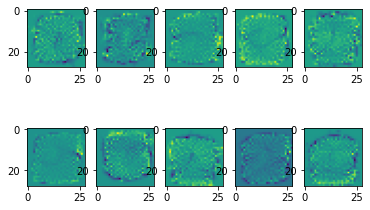

In [146]:
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(lr.coef_[i,:].reshape((28,28)))

In [ ]:
# Let's try turning up the regularization!
# The C parameter controls the strength of the regularization
# for sklearn's LogisticRegression.  Smaller values of C are more regularization.
# The default regularization is L2.

In [ ]:
crange = np.power(10, np.arange(-7.0, 2, 1))

In [ ]:
%%time
fits = []
for c in crange:
    print(c)
    fits.append(LogisticRegression(C=c, max_iter=100).fit(X, Y))

In [147]:
len(fits)

9

In [ ]:
fits

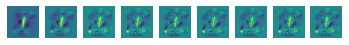

In [148]:

p, a =plt.subplots(1, len(fits))
for i in range(len(fits)):
    plt.subplot(1, len(fits), i+1)
    plt.imshow(fits[i].coef_[1,:].reshape((28,28)))
    plt.axis("off")


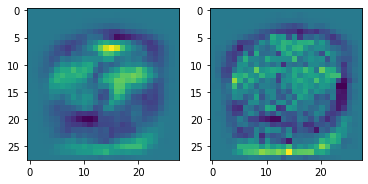

In [151]:
# Let us compare a highly regularized set of linear regression 
# coefficients with a almost-unregularized set.

plt.subplot(1,2,1)
plt.imshow(fits[0].coef_[9,:].reshape((28,28)))
plt.subplot(1,2,2)
plt.imshow(fits[-1].coef_[9,:].reshape((28,28)))


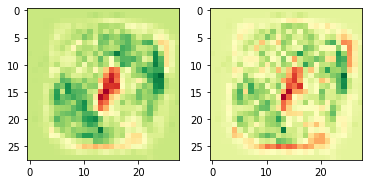

In [157]:
# Maybe a diverging colormap would help us here?

plt.subplot(1,2,1)
plt.imshow(fits[1].coef_[0,:].reshape((28,28)), cmap="RdYlGn")
plt.subplot(1,2,2)
plt.imshow(fits[-1].coef_[0,:].reshape((28,28)), cmap="RdYlGn")

In [154]:
accuracy = [f.score(testX, testY) for f in fits]

[]

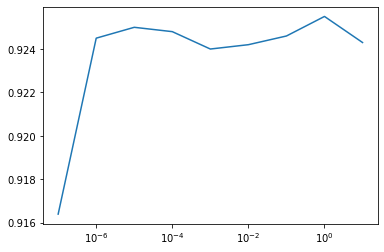

In [156]:
plt.plot(crange, accuracy)
plt.semilogx()

(array([  3.,   1.,   5.,   4.,  10.,  28.,  32.,  49.,  46.,  83., 390.,
         49.,  25.,  20.,   8.,   8.,   3.,   1.,   2.,   0.,   2.,   3.,
          3.,   1.,   1.,   2.,   1.,   2.,   0.,   2.]),
 array([-1.24207937e-03, -1.12816811e-03, -1.01425685e-03, -9.00345595e-04,
        -7.86434337e-04, -6.72523079e-04, -5.58611821e-04, -4.44700563e-04,
        -3.30789305e-04, -2.16878047e-04, -1.02966789e-04,  1.09444687e-05,
         1.24855727e-04,  2.38766984e-04,  3.52678242e-04,  4.66589500e-04,
         5.80500758e-04,  6.94412016e-04,  8.08323274e-04,  9.22234532e-04,
         1.03614579e-03,  1.15005705e-03,  1.26396831e-03,  1.37787956e-03,
         1.49179082e-03,  1.60570208e-03,  1.71961334e-03,  1.83352460e-03,
         1.94743585e-03,  2.06134711e-03,  2.17525837e-03]),
 <BarContainer object of 30 artists>)

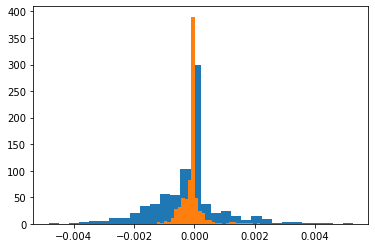

In [158]:
# The regularized parameters should be closer to 0...
plt.hist(fits[-1].coef_[1,:], bins=30)
plt.hist(fits[0].coef_[1,:], bins=30)

In [ ]:
# What about L1 regularization?  This will effectively throw
# out pixels that have too little influence on the result.

fits_l1 = []
for c in crange:
    print(c)
    fits_l1.append(LogisticRegression(C=c, max_iter=100, penalty="l1", solver="liblinear").fit(X, Y))

Text(0, 0.5, 'Accuracy on holdout set')

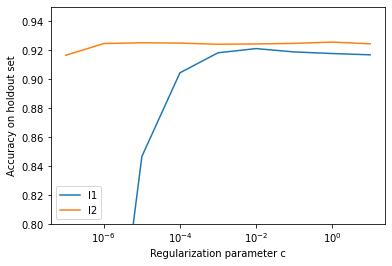

In [159]:
accuracy_l1 = [f.score(testX, testY) for f in fits_l1]
plt.plot(crange, accuracy_l1, label="l1")
plt.plot(crange, accuracy, label="l2")
plt.semilogx()
plt.ylim((0.8, 0.95))
plt.legend()
plt.xlabel("Regularization parameter c")
plt.ylabel("Accuracy on holdout set")

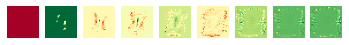

In [160]:
for i in range(len(fits)):
    plt.subplot(1, len(fits), i+1)
    plt.imshow(fits_l1[i].coef_[1,:].reshape((28,28)), cmap="RdYlGn")
    plt.axis("off")

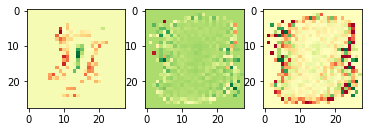

In [161]:
plt.subplot(1,3,1)
plt.imshow(fits_l1[3].coef_[1,:].reshape((28,28)), cmap="RdYlGn")
plt.subplot(1,3,2)
plt.imshow(fits_l1[6].coef_[1,:].reshape((28,28)), cmap="RdYlGn")
plt.subplot(1,3,3)
l=0.03
plt.imshow(np.maximum(-l, np.minimum(l, fits_l1[6].coef_[1,:].reshape((28,28)))), cmap="RdYlGn")

In [162]:
from sklearn.decomposition import TruncatedSVD

In [163]:
svd = TruncatedSVD( 50).fit(X)

In [164]:
svd.explained_variance_ratio_

array([0.05807749, 0.08246405, 0.07095205, 0.06116264, 0.05283004,
       0.04319133, 0.03626566, 0.02910758, 0.02878759, 0.02363035,
       0.02124947, 0.02050351, 0.01716084, 0.0170527 , 0.01590455,
       0.01489269, 0.01363987, 0.01295398, 0.01189454, 0.01152786,
       0.01066264, 0.01006965, 0.00954502, 0.00914597, 0.00884229,
       0.00839983, 0.00814283, 0.00786443, 0.00744774, 0.0069098 ,
       0.00658428, 0.00648335, 0.00602925, 0.00590371, 0.00570117,
       0.00544188, 0.00505758, 0.00487633, 0.00481406, 0.00472497,
       0.0045707 , 0.00444615, 0.00419877, 0.00397246, 0.00384919,
       0.00374314, 0.00360907, 0.00350744, 0.00337306, 0.0032114 ])

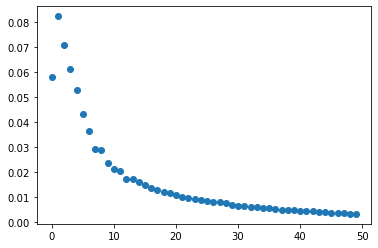

In [165]:
plt.plot(svd.explained_variance_ratio_, 'o')

In [ ]:
svd.components_.shape

In [ ]:
p, a =plt.subplots(1, len(fits))
for i in range(25):
    plt.subplot(5,5 , i+1)
    plt.imshow(svd.components_[i].reshape((28,28)))
    plt.axis("off")

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
svdreg = TruncatedSVD( 50).fit(scaler.transform(X))

In [ ]:
plt.plot(svdreg.explained_variance_ratio_, 'o')

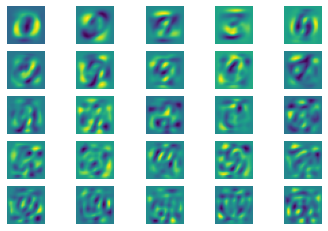

In [171]:
for i in range(25):
    plt.subplot(5,5 , i+1)
    plt.imshow(svdreg.components_[i].reshape((28,28)))
    plt.axis("off")

In [ ]:
# Keep in mind, these are from the variance of the data--no labels
# were used in constructing these vectors.
# And, this procedure is linear in the data; no regularization 
# was applied, just averaging.

In [ ]:
# Now we can project X onto the PCA components; we do 
# this by matrix multiplication

In [1]:
svd.components_.shape

NameError: name 'svd' is not defined

In [167]:
PC = np.dot( X, svd.components_.T)

In [168]:
PC.shape

(60000, 50)

In [169]:
h = {0: "black", 1:"brown", 2:"red", 3:"orange", 4:"yellow",
    5:"green", 6:"blue", 7:"purple", 8:"grey", 9:"white"}
colorlabels = []
for i,l in enumerate(Y):
    colorlabels.append(h[l])


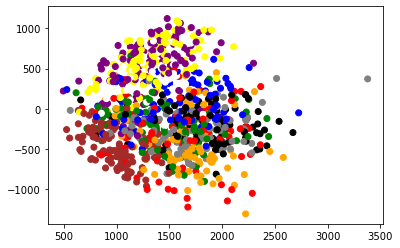

In [170]:
plt.scatter(PC[0:1000,0], PC[0:1000,2] , c= colorlabels[0:1000])

In [178]:
# Calculate average digits
avgdigit =[]
stddigit =[]
for i in range(10):
    avgdigit.append(images[np.where(labels==i)].mean(axis=0).reshape((28,28)))
    stddigit.append(images[np.where(labels==i)].std(axis=0).reshape((28,28)))
avgdigit=np.array(avgdigit)
avgdigit.shape

(10, 28, 28)

In [179]:
avgdigit_reshape = avgdigit.reshape((10, -1))

In [194]:
svd_avg = TruncatedSVD(9).fit(scaler.transform(avgdigit_reshape))

In [195]:
svd_avg.components_.shape

(9, 784)

In [196]:
PC = np.dot(svd_avg.components_, X.T).T

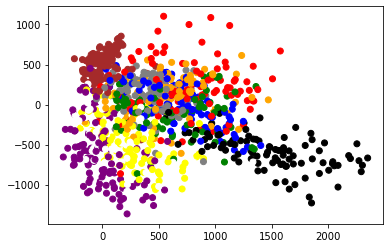

In [198]:
plt.scatter(PC[0:1000,0], PC[0:1000,1] , c= colorlabels[0:1000])

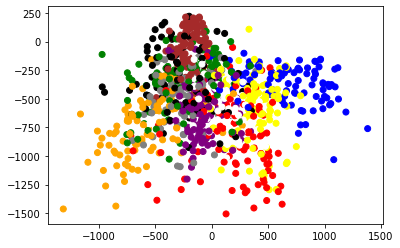

In [199]:
plt.scatter(PC[0:1000,2], PC[0:1000,3] , c= colorlabels[0:1000])

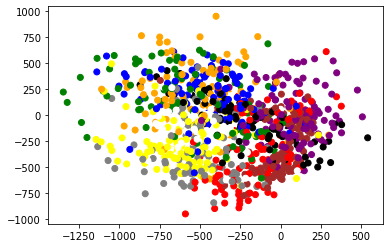

In [200]:
plt.scatter(PC[0:1000,4], PC[0:1000,5] , c= colorlabels[0:1000])